2024-07-13 14:11:56.129620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 14:11:56.470567: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 14:11:57.410354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-13 14:11:59.957557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://g

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1720872723.816636    5229 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


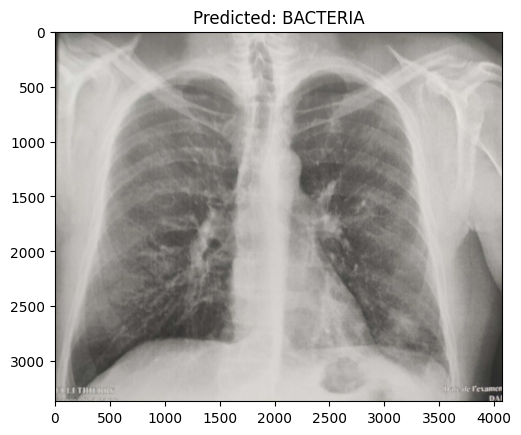

NORMAL: 17.21%
VIRUS: 22.09%
BACTERIA: 60.71%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from pathlib import Path
import os

# Charger le modèle sauvegardé
model = load_model('8_modele_final_fine_tuning_40_updated1_w_params_best.keras')

# Dictionnaire des noms de classe
class_names = {0: 'NORMAL', 1: 'VIRUS', 2: 'BACTERIA'}

# Fonction pour charger et prétraiter l'image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Chemin de l'image à tester
CWD = Path.cwd()
img_path =  CWD / "radio_TA.jpg"

# Charger et prétraiter l'image
img_array = load_and_preprocess_image(img_path)

# Prédire la classe de l'image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Afficher l'image et la prédiction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.show()

# Afficher les probabilités de chaque classe
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")
